[Kaggle](https://www.kaggle.com/imakash3011/customer-personality-analysis)

#### Equipe:
* Airton Carneiro
* João Pedro do Nascimento Sandolin
* Luís Eraldo Cassias Pereira
* Tulio de Souza Freire

### Dataset: Customer Personality

### **Content Attributes**

##### People

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

##### Products

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

##### Promotion

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

##### Place

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

#### Importação das bibliotecas utilizadas e confiurações.


In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

pd.options.display.float_format= "{:,.2f}".format

### Carregando e ajustando o Dataset

#### Lendo o Dataset e exibindo algumas linhas para se ter uma ideia do que há nele.

In [2]:
df = pd.read_csv('dados/marketing_campaign.csv', sep='\t')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,"58,138.00",0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,"46,344.00",1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,"71,613.00",0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,"26,646.00",1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,"58,293.00",1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


#### Ao analisar o Dataset exibido acima, verificamos que as colunas não estão na mesma ordem da descrição e que existem duas colunas não descritas.

#### Para tornar a interpretação mais fácil,  as colunas foram renomeadas para o português.

In [3]:

novos_nomes_das_cols = [
    'ID',                            'Ano_Nasc',
    'Escolaridade',                  'Estado_Civil',
    'Renda_Familiar_Anual',          'Qtd_Criancas',
    'Qtd_Adolesc',                   'Dt_Cadastro', 
    'Ult_Compra_EmDias',             'Gastos_Em_Vinho_Ult2Anos',
    'Gastos_Em_Frutas_Ult2Anos',     'Gastos_Em_Carnet2Ano',
    'Gastos_Em_Pescados_Ult2Anos',   'Gastos_Em_Doces_Ult2Anos',
    'Gastos_Em_Prod_Ouro_Ult2Anos',  'Qtd_Compras_ComDesconto',
    'Qtd_Compras_OnLine',            'Qtd_Compras_Catalogo',
    'Qtd_Compras_Loja',              'Qtd_Acessos_AoSite_UltMes',
    'Oferta_Aceita_3aCamp',          'Oferta_Aceita_4aCamp',
    'Oferta_Aceita_5aCamp',          'Oferta_Aceita_1aCamp',
    'Oferta_Aceita_2aCamp',          'Cat_Cliente_Reclamou_Ult2Anos',
    'Col_nao_descrita01',            'Col_nao_descrita02',
    'Oferta_Aceita_UltCamp'                 
    ]

df.columns = novos_nomes_das_cols
df.head()

,ID,Ano_Nasc,Escolaridade,Estado_Civil,Renda_Familiar_Anual,Qtd_Criancas,Qtd_Adolesc,Dt_Cadastro,Ult_Compra_EmDias,Gastos_Em_Vinho_Ult2Anos,...,Qtd_Acessos_AoSite_UltMes,Oferta_Aceita_3aCamp,Oferta_Aceita_4aCamp,Oferta_Aceita_5aCamp,Oferta_Aceita_1aCamp,Oferta_Aceita_2aCamp,Cat_Cliente_Reclamou_Ult2Anos,Col_nao_descrita01,Col_nao_descrita02,Oferta_Aceita_UltCamp
0,5524,1957,Graduation,Single,"58,138.00",0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,"46,344.00",1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,"71,613.00",0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,"26,646.00",1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,"58,293.00",1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


#### Checando se há apenas uma entrada por ID

In [4]:
print("Número máximo de entradas de cada ID: ")
df.groupby("ID").agg("ID").count().max()

Número máximo de entradas de cada ID: 


1

#### Modificando a estrutura de dados do Dataset

Serão excluídos do Dataframe as colunas 'ID', 'Col_nao_descrita01', 'Col_nao_descrita02' pois, para este estudo, elas não serão necessárias.

In [5]:
# Excluir colunas que não serão usadas no estudo
df.drop(['ID', 'Col_nao_descrita01', 'Col_nao_descrita02'], axis=1, inplace=True)

#### Checando o tipo de dados de cada coluna

In [6]:
df.dtypes

Ano_Nasc                           int64
Escolaridade                      object
Estado_Civil                      object
Renda_Familiar_Anual             float64
Qtd_Criancas                       int64
Qtd_Adolesc                        int64
Dt_Cadastro                       object
Ult_Compra_EmDias                  int64
Gastos_Em_Vinho_Ult2Anos           int64
Gastos_Em_Frutas_Ult2Anos          int64
Gastos_Em_Carnet2Ano               int64
Gastos_Em_Pescados_Ult2Anos        int64
Gastos_Em_Doces_Ult2Anos           int64
Gastos_Em_Prod_Ouro_Ult2Anos       int64
Qtd_Compras_ComDesconto            int64
Qtd_Compras_OnLine                 int64
Qtd_Compras_Catalogo               int64
Qtd_Compras_Loja                   int64
Qtd_Acessos_AoSite_UltMes          int64
Oferta_Aceita_3aCamp               int64
Oferta_Aceita_4aCamp               int64
Oferta_Aceita_5aCamp               int64
Oferta_Aceita_1aCamp               int64
Oferta_Aceita_2aCamp               int64
Cat_Cliente_Recl

#### Para trabalhar mais eficientemente com os dados, os tipos de dados das colunas foram ajustados

In [7]:
# Convertendo a coluna 'Dt_Cadastro' de Object para Date
df['Dt_Cadastro']=df['Dt_Cadastro'].astype('datetime64')

# Convertendo as colunas dos gastos de float64 para Float
colunas = ['Gastos_Em_Vinho_Ult2Anos', 'Gastos_Em_Frutas_Ult2Anos',
    'Gastos_Em_Carnet2Ano', 'Gastos_Em_Pescados_Ult2Anos',
    'Gastos_Em_Doces_Ult2Anos', 'Gastos_Em_Prod_Ouro_Ult2Anos','Renda_Familiar_Anual']
df[colunas] = df[colunas].astype(np.float32)

# Convertendo para categóricas as variáveis deste tipo
colunas = ['Escolaridade', 'Estado_Civil']
df[colunas] = df[colunas].astype('category')

# Convertendo todas as colunas do tipo 'int64' para 'int32'
df = df.astype({col: 'int32' for col in df.select_dtypes('int64').columns})

df.dtypes

Ano_Nasc                                  int32
Escolaridade                           category
Estado_Civil                           category
Renda_Familiar_Anual                    float32
Qtd_Criancas                              int32
Qtd_Adolesc                               int32
Dt_Cadastro                      datetime64[ns]
Ult_Compra_EmDias                         int32
Gastos_Em_Vinho_Ult2Anos                float32
Gastos_Em_Frutas_Ult2Anos               float32
Gastos_Em_Carnet2Ano                    float32
Gastos_Em_Pescados_Ult2Anos             float32
Gastos_Em_Doces_Ult2Anos                float32
Gastos_Em_Prod_Ouro_Ult2Anos            float32
Qtd_Compras_ComDesconto                   int32
Qtd_Compras_OnLine                        int32
Qtd_Compras_Catalogo                      int32
Qtd_Compras_Loja                          int32
Qtd_Acessos_AoSite_UltMes                 int32
Oferta_Aceita_3aCamp                      int32
Oferta_Aceita_4aCamp                    

### Explorando e Limpando os Dados

In [8]:
df.describe()

,Ano_Nasc,Renda_Familiar_Anual,Qtd_Criancas,Qtd_Adolesc,Ult_Compra_EmDias,Gastos_Em_Vinho_Ult2Anos,Gastos_Em_Frutas_Ult2Anos,Gastos_Em_Carnet2Ano,Gastos_Em_Pescados_Ult2Anos,Gastos_Em_Doces_Ult2Anos,...,Qtd_Compras_Catalogo,Qtd_Compras_Loja,Qtd_Acessos_AoSite_UltMes,Oferta_Aceita_3aCamp,Oferta_Aceita_4aCamp,Oferta_Aceita_5aCamp,Oferta_Aceita_1aCamp,Oferta_Aceita_2aCamp,Cat_Cliente_Reclamou_Ult2Anos,Oferta_Aceita_UltCamp
count,"2,240.00","2,216.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00",...,"2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00","2,240.00"
mean,"1,968.81","52,247.25",0.44,0.51,49.11,303.94,26.30,166.95,37.53,27.06,...,2.66,5.79,5.32,0.07,0.07,0.07,0.06,0.01,0.01,0.15
std,11.98,"25,173.08",0.54,0.54,28.96,336.60,39.77,225.72,54.63,41.28,...,2.92,3.25,2.43,0.26,0.26,0.26,0.25,0.11,0.10,0.36
min,"1,893.00","1,730.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,959.00","35,303.00",0.00,0.00,24.00,23.75,1.00,16.00,3.00,1.00,...,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"1,970.00","51,381.50",0.00,0.00,49.00,173.50,8.00,67.00,12.00,8.00,...,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,"1,977.00","68,522.00",1.00,1.00,74.00,504.25,33.00,232.00,50.00,33.00,...,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,"1,996.00","666,666.00",2.00,2.00,99.00,"1,493.00",199.00,"1,725.00",259.00,263.00,...,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


#### Checagem das colunas que possuem nulos

In [9]:
# retornando quais colunas tem valores nulos
pd.isnull(df).sum()[pd.isnull(df).sum() > 0]

Renda_Familiar_Anual    24
dtype: int64

#### Como NaNs representam menos de 2% das linhas, decidimos eliminar todas as linhas com NaNs.

In [10]:
df.dropna(inplace=True)
pd.isnull(df).sum()[pd.isnull(df).sum() > 0]

Series([], dtype: int64)

#### Checagem das categorias de escolaridade

In [11]:
df.Escolaridade.unique()

['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']
Categories (5, object): ['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD']

#### Não estava claro o significado de '2n Cycle'. Após pesquisar, descobrimos que se trata de mestrado. Então substituímos essa categoria pela categoria 'Master', mais fácil de entender.

In [12]:
# substituindo '2n Cycle por Masters'
df['Escolaridade'].replace({'2n Cycle':'Master'}, inplace=True)
df['Escolaridade'].unique()

['Graduation', 'PhD', 'Master', 'Basic']
Categories (4, object): ['Basic', 'Graduation', 'Master', 'PhD']

#### Checagem das categorias de estado civil

In [13]:
estado_civil = df[["Estado_Civil"]].groupby("Estado_Civil").agg({"Estado_Civil":"count"})
estado_civil.columns=["Quantidade"]
estado_civil

,Quantidade
Estado_Civil,
Absurd,2
Alone,3
Divorced,232
Married,857
Single,471
Together,573
Widow,76
YOLO,2


#### Como as categorias "Absurd" e "YOLO" não trazem informações úteis  respeito do estado civil e são apenas 4 linhas, resolvemos eliminá-las do Dataset também.

In [14]:
print(f"dimensão antes: {df.shape}")

df.drop(df[(df["Estado_Civil"]=="Absurd") | (df["Estado_Civil"]=="YOLO") ].index, inplace=True)

print(f"dimensão após remover: {df.shape}")


dimensão antes: (2216, 26)
dimensão após remover: (2212, 26)


In [15]:
#livrando espaço ocupado pelo df estado civil
estado_civil = None

#### Checando os anos de nascimentos

In [16]:
df.groupby("Ano_Nasc").agg({"Ano_Nasc":"count"})

,Ano_Nasc
Ano_Nasc,
1893,1
1899,1
1900,1
1940,1
1941,1
1943,6
1944,7
1945,8
1946,16


#### Nascimentos anteriores a 1900 parecem estar relacionados a erros de digitação, uma vez que a tecla 8 fica ao lado da tecla 9.  Então é possível corrigir os dois anos de nascimento do céculo 19 que apareceram. 


#### Já a o ano de 1900, melhor remover a linha do dataset

In [17]:
# Corrigindo erros de digitação nos anos de nascimento
df["Ano_Nasc"] = (df["Ano_Nasc"]<1900)*100+df["Ano_Nasc"]

# Excluindo ano de nascimento 1900
df.drop(df[df["Ano_Nasc"]==1900].index, inplace=True)

#checando novamente ano de nascimento mínimo.
df["Ano_Nasc"].min()

1940

#### Como algumas informações presentes no dataset estão na dimensão de '2 anos', convertemos o 'Renda_Familiar_Anual' para 'Renda_Familiar_Bienal' (nova coluna)

In [18]:
df['Renda_Familiar_Bienal']=df['Renda_Familiar_Anual'] * 2
df

,Ano_Nasc,Escolaridade,Estado_Civil,Renda_Familiar_Anual,Qtd_Criancas,Qtd_Adolesc,Dt_Cadastro,Ult_Compra_EmDias,Gastos_Em_Vinho_Ult2Anos,Gastos_Em_Frutas_Ult2Anos,...,Qtd_Compras_Loja,Qtd_Acessos_AoSite_UltMes,Oferta_Aceita_3aCamp,Oferta_Aceita_4aCamp,Oferta_Aceita_5aCamp,Oferta_Aceita_1aCamp,Oferta_Aceita_2aCamp,Cat_Cliente_Reclamou_Ult2Anos,Oferta_Aceita_UltCamp,Renda_Familiar_Bienal
0,1957,Graduation,Single,"58,138.00",0,0,2012-04-09,58,635.00,88.00,...,4,7,0,0,0,0,0,0,1,"116,276.00"
1,1954,Graduation,Single,"46,344.00",1,1,2014-08-03,38,11.00,1.00,...,2,5,0,0,0,0,0,0,0,"92,688.00"
2,1965,Graduation,Together,"71,613.00",0,0,2013-08-21,26,426.00,49.00,...,10,4,0,0,0,0,0,0,0,"143,226.00"
3,1984,Graduation,Together,"26,646.00",1,0,2014-10-02,26,11.00,4.00,...,4,6,0,0,0,0,0,0,0,"53,292.00"
4,1981,PhD,Married,"58,293.00",1,0,2014-01-19,94,173.00,43.00,...,6,5,0,0,0,0,0,0,0,"116,586.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,"61,223.00",0,1,2013-06-13,46,709.00,43.00,...,4,5,0,0,0,0,0,0,0,"122,446.00"
2236,1946,PhD,Together,"64,014.00",2,1,2014-10-06,56,406.00,0.00,...,5,7,0,0,0,1,0,0,0,"128,028.00"
2237,1981,Graduation,Divorced,"56,981.00",0,0,2014-01-25,91,908.00,48.00,...,13,6,0,1,0,0,0,0,0,"113,962.00"
2238,1956,Master,Together,"69,245.00",0,1,2014-01-24,8,428.00,30.00,...,10,3,0,0,0,0,0,0,0,"138,490.00"


### Insights

#### Verificando se a alta renda familiar está relacionada à escolaridade (João)

In [19]:
df.groupby('Escolaridade')[['Renda_Familiar_Anual']].mean().rename(columns = {'Renda_Familiar_Anual':'Renda_Media_Anual'})

,Renda_Media_Anual
Escolaridade,
Basic,"20,306.26"
Graduation,"52,696.59"
Master,"51,046.91"
PhD,"56,177.52"


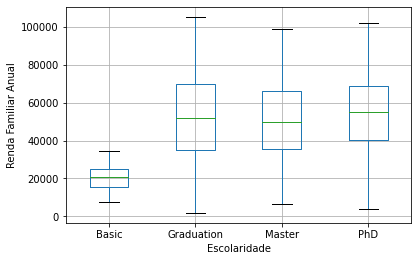

In [38]:
df_copy = df[['Escolaridade','Renda_Familiar_Anual']].copy()

#removendo outliers
df_copy = df_copy.loc[df_copy["Renda_Familiar_Anual"] < 110000]
plot1 = df_copy.boxplot(by = 'Escolaridade')

plt.title('')
plt.suptitle('')
plot1.set_xlabel("Escolaridade");
plot1.set_ylabel("Renda Familiar Anual");
plot1 = plt.show()

#### Quais faixas etárias consomem mais? (João)

In [21]:
ano_base = df[['Dt_Cadastro']].apply(lambda x: x['Dt_Cadastro'].year, axis =1).unique().max()
ano_base

2014

In [22]:
df['Total_Gastos_Ult2Anos'] = df.apply(lambda linha: linha['Gastos_Em_Vinho_Ult2Anos':'Gastos_Em_Prod_Ouro_Ult2Anos'].sum(), axis=1)
df['Idade'] = ano_base - df['Ano_Nasc']

In [23]:
# Agrupando as idades por faixas etárias
faixas_etarias = { 0:'Abaixo de 20', 1:'De 20 à 39', 2:'De 40 à 59', 3:'De 60 à 79', 4:'De 80 à 99'}
# Criando nova coluna contendo as faixas etárias
df['Faixa_Etaria'] = df.apply(lambda faixa: faixas_etarias.get(faixa['Idade'] // 20), axis=1)

In [24]:
df_gastos = df.groupby(['Faixa_Etaria'])[['Total_Gastos_Ult2Anos']].mean()
df_gastos

,Total_Gastos_Ult2Anos
Faixa_Etaria,
Abaixo de 20,724.62
De 20 à 39,542.30
De 40 à 59,610.16
De 60 à 79,750.45


<AxesSubplot:xlabel='Faixa_Etaria'>

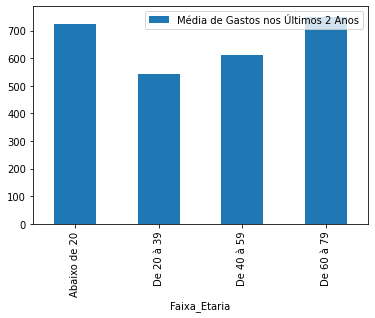

In [25]:
df_gastos = df.groupby(['Faixa_Etaria'])[['Total_Gastos_Ult2Anos']].mean()
df_gastos.rename(columns = {'Total_Gastos_Ult2Anos':'Média de Gastos nos Últimos 2 Anos'}).plot.bar()

#### Os casados são mais comedidos com os gastos que os solteiros? (João)

In [26]:
df.groupby('Estado_Civil')[['Total_Gastos_Ult2Anos']].mean().loc[['Married','Single']]

,Total_Gastos_Ult2Anos
Estado_Civil,
Married,591.46
Single,612.59


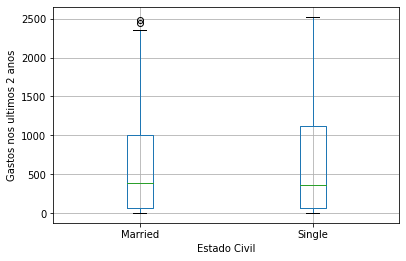

In [27]:
df_copy = df[['Estado_Civil','Total_Gastos_Ult2Anos']].copy()
df_copy = df_copy[df_copy['Estado_Civil'].isin(['Married','Single'])]

df_copy.Estado_Civil = df_copy.Estado_Civil.cat.remove_unused_categories()
plot = df_copy.boxplot(by = 'Estado_Civil')

plt.title('')
plt.suptitle('')
plot.set_xlabel("Estado Civil");
plot.set_ylabel("Gastos nos ultimos 2 anos");
plot = plt.show()

apresentação de túlio
#### Apresentando os principais grupos de Faixa Etária por estilo de compra (online, loja física, etc)

In [28]:
##################
# Airton #########
##################

df_estilo_compra = df.groupby(['Faixa_Etaria'])[['Qtd_Compras_OnLine', 'Qtd_Compras_Catalogo', 'Qtd_Compras_Loja']].agg('sum')
df_estilo_compra

,Qtd_Compras_OnLine,Qtd_Compras_Catalogo,Qtd_Compras_Loja
Faixa_Etaria,,,
Abaixo de 20,22,31,45
De 20 à 39,2764,1794,4110
De 40 à 59,4782,3009,6634
De 60 à 79,1462,1067,2039


<AxesSubplot:xlabel='Faixa_Etaria'>

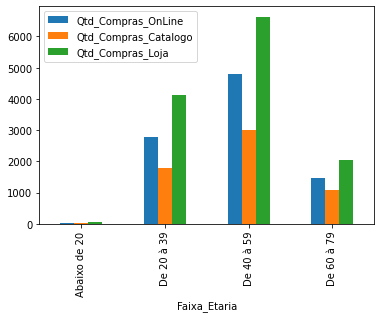

In [29]:
df_estilo_compra.plot.bar()

#### Este comportamento também se reflete no acesso ao site da loja dos últimos 30 dias?

In [30]:
# Airton
df_compras_30d = df.groupby(['Faixa_Etaria'])[['Qtd_Compras_OnLine', 'Qtd_Acessos_AoSite_UltMes']].agg('sum')
df_compras_30d

,Qtd_Compras_OnLine,Qtd_Acessos_AoSite_UltMes
Faixa_Etaria,,
Abaixo de 20,22,36
De 20 à 39,2764,4229
De 40 à 59,4782,6037
De 60 à 79,1462,1461


<AxesSubplot:xlabel='Faixa_Etaria'>

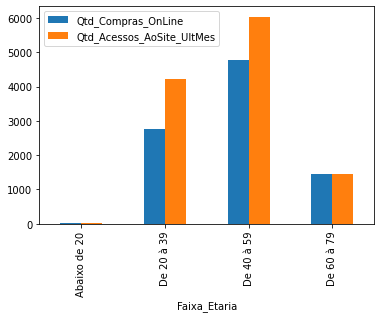

In [31]:
df_compras_30d.plot.bar()

#### Apresentando o poder de alcance das campanhas (em qual campanha a pessoa costuma aderir) por Faixa Etária e Renda.

In [32]:
# Airton
# alguém sabe fazer com que os números abaixo sejam representados por %?
# tipo: A 'oferta_aceita_3aCamp' para 'Abaixo de 20' está como 2. Se temos 7 pessoas nesta faixa etária, então como mostraríamos 28%?
df_campanhas = df.groupby(['Faixa_Etaria'])[['Oferta_Aceita_1aCamp', 'Oferta_Aceita_2aCamp', 'Oferta_Aceita_3aCamp',          'Oferta_Aceita_4aCamp',
    'Oferta_Aceita_5aCamp',]].agg('sum')
df_campanhas

,Oferta_Aceita_1aCamp,Oferta_Aceita_2aCamp,Oferta_Aceita_3aCamp,Oferta_Aceita_4aCamp,Oferta_Aceita_5aCamp
Faixa_Etaria,,,,,
Abaixo de 20,0,0,2,0,2
De 20 à 39,54,7,72,36,60
De 40 à 59,62,21,70,100,69
De 60 à 79,25,2,19,28,30


<AxesSubplot:xlabel='Faixa_Etaria'>

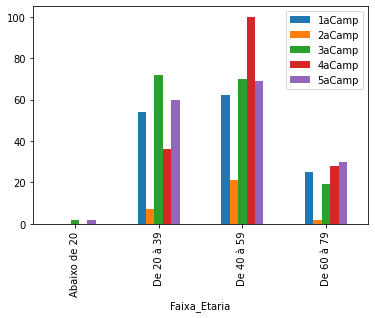

In [33]:
df_campanhas.rename(columns = {coluna:coluna[-6:] for coluna in df_campanhas.columns})[['1aCamp','2aCamp','3aCamp','4aCamp','5aCamp']].plot.bar()

#### Em média, de quantas campanhas os clientes pariticipam?

In [34]:
df['Total_Ofertas_Aceitas'] = df.apply(lambda linha: linha[['Oferta_Aceita_3aCamp','Oferta_Aceita_4aCamp','Oferta_Aceita_5aCamp','Oferta_Aceita_1aCamp','Oferta_Aceita_2aCamp', 'Oferta_Aceita_UltCamp' ]].sum(), axis=1)

(df['Total_Ofertas_Aceitas'].value_counts()/df.shape[0]).to_frame()

,Total_Ofertas_Aceitas
0,0.73
1,0.17
2,0.06
3,0.02
4,0.02
5,0.00


In [35]:
media_part_camp = (df['Total_Ofertas_Aceitas'].value_counts()/df.shape[0]).to_frame().reset_index().apply(lambda x: x['Total_Ofertas_Aceitas']*x['index'], axis =1 ).sum()
media_part_camp 

0.44776119402985076

#### Qual a média de gasto por número de campanhas aceitas? (Apresentação Luis)

In [36]:
total_linhas = df["Ano_Nasc"].size

resumo = df.groupby("Total_Ofertas_Aceitas").agg({"Ano_Nasc":"count", "Gastos_Em_Prod_Ouro_Ult2Anos":"sum"})

resumo["media_consumo_ofertas"] = resumo["Gastos_Em_Prod_Ouro_Ult2Anos"]/resumo["Ano_Nasc"]

resumo.rename(columns={"Ano_Nasc":"Qtd_Pessoas"},inplace=True)

resumo

,Qtd_Pessoas,Gastos_Em_Prod_Ouro_Ult2Anos,media_consumo_ofertas
Total_Ofertas_Aceitas,,,
0,1608,"60,674.00",37.73
1,368,"20,635.00",56.07
2,139,"7,720.00",55.54
3,50,"4,167.00",83.34
4,36,"3,122.00",86.72
5,10,592.00,59.20


### Tentando descobrir quando as campanhas aconteceram. (Apresentação Luis)

In [37]:
# Lista para armazenar as datas mais recentes de cadastro 
# referente ao grupo de pessoas que aceitou oferta de determinada campanha.

datas_maximas=[]

indices = range(1,7)

# Colocando na lista a data de cadastro mais recente dos participantes de cada campanha
for indice in indices:
    
    if indice<6:
        coluna = "Oferta_Aceita_"+str(indice)+"aCamp"

    else:
        coluna = "Oferta_Aceita_UltCamp"
        pass
    
    datas_maximas.append(df[df[coluna]==1]["Dt_Cadastro"].max())
        

# Construindo um dataframe para os dados das campanhas

df_campanhas = pd.DataFrame({"camp_index": indices,  "cadastro_mais_recente":datas_maximas})

df_campanhas.set_index("camp_index", inplace=True)

df_campanhas.sort_values("cadastro_mais_recente", inplace=True)



print(f"Cadastro mais antigo do dataframe original: {df['Dt_Cadastro'].min()}")

print(f"Cadastro mais recente do dataframe original: {df['Dt_Cadastro'].max()}")

print("Dentre os que aceitaram ofertas de cada campanha, o cadastro mais recente é da data...")

df_campanhas

Cadastro mais antigo do dataframe original: 2012-01-08 00:00:00
Cadastro mais recente do dataframe original: 2014-12-06 00:00:00
Dentre os que aceitaram ofertas de cada campanha, o cadastro mais recente é da data...


,cadastro_mais_recente
camp_index,
2,2014-06-17
3,2014-11-02
1,2014-12-02
6,2014-12-02
4,2014-12-03
5,2014-12-05


#### 1. Apresente as características do conjunto de dados fornecido, destacando sua visão geral acerca do conjunto de dados e tecendo críticas e comentários.

#### 2. Faça uma análise detalhada das variáveis numéricas e categóricas da base de dados, discutindo sua distribuição e outras características relevantes.

#### 3. Limpeza de dados: Considere a avaliação da existência de valores ausentes e de possíveis outliers, discutindindo como estes podem ser tratados e eliminados;

#### 4. Feature engineering: Quais variáveis você poderia criar para enriquecer a análise?

#### 5. Enriquecimento da base: Inclua qualquer outra informação/análise que achar importante.

#### 6. Que outras bases externas ou internas você buscaria para enriquecer as análises?

Uma base com dados das campanhas permitiria associar a taxa de penetração das campanhas com relação a datas comemorativas ou sazonalidade.

Uma base de dados com gastos por faixa etária da população em geral com produtos similares, permitira verificar se estamos acima ou abaixo da média dos concorrentes. Poderia ser alguma base de dados de associação comercial, por exemplo.



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1f826d52-8bc7-47a7-8f9d-9b5ff7245f3a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>